In [21]:
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

# GPS time for GW150914
t_merger = 1126259462.4
window = 4

In [35]:
print("getting data ...")
data_H1 = TimeSeries.fetch_open_data('H1', t_merger-window, t_merger+window)
data_L1 = TimeSeries.fetch_open_data('L1', t_merger-window, t_merger+window)


getting data ...


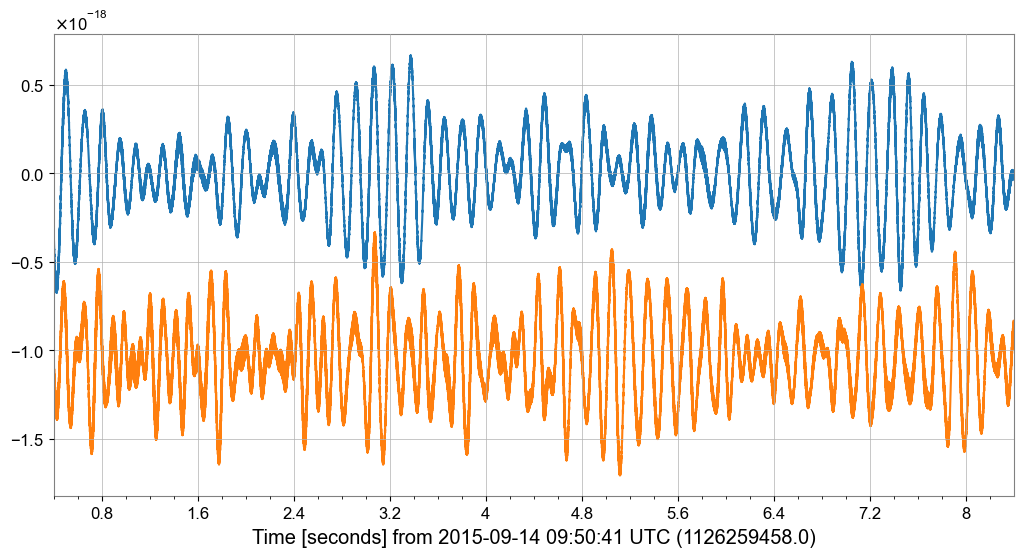

In [36]:
from gwpy.plot import Plot

plot = Plot(data_H1, data_L1, figsize= (12, 6))

In [44]:
data_H1.whiten().bandpass(50, 300)
data_L1.whiten().bandpass(50, 300)

<TimeSeries([ 0.00756206,  0.05090966,  0.09142292, ...,
             -0.00580764, -0.00566819, -0.0052919 ]
            unit=Unit(dimensionless),
            t0=<Quantity 1.12625946e+09 s>,
            dt=<Quantity 0.00024414 s>,
            name='Strain',
            channel=None)>

In [45]:
crop_h1 = data_H1.crop(t_merger - 0.05, t_merger + 0.05)
crop_l1 = data_L1.crop(t_merger - 0.05, t_merger + 0.05)

In [56]:
import numpy as np

correlation_between_l1_h1 = np.correlate(crop_h1.value, -crop_l1.value, mode='full')
lags = np.arange(len(correlation_between_l1_h1)) - (len(crop_h1) - 1)
dt_samples = lags[np.argmax(correlation_between_l1_h1)]
dt_seconds = dt_samples / data_H1.sample_rate.value
print(f"Measured time delay: {dt_seconds * 1000:.2f} ms")

Measured time delay: -67.87 ms


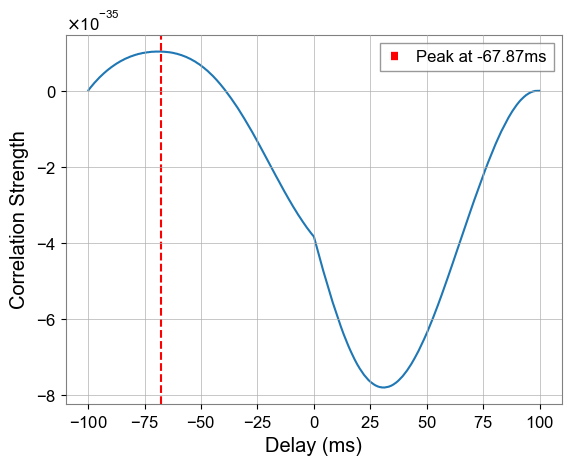

In [57]:
plt.plot(lags * (1000/data_H1.sample_rate.value), correlation_between_l1_h1)
plt.axvline(dt_seconds * 1000, color='red', linestyle='--', label=f'Peak at {dt_seconds*1000:.2f}ms')
plt.xlabel('Delay (ms)')
plt.ylabel('Correlation Strength')
plt.legend()
plt.show()